# Analyze music listening trends on Spotify and Youtube
### Spotify and Youtube dataset: Dataset of songs of various artist in the world and for each song is present:
* Several statistics of the music version on spotify, including the number of streams.
* Number of views of the official music video of the song on youtube.


## Import libraries and dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read dataset

In [2]:
# Read dataset
df = pd.read_csv('./data/Spotify_Youtube.csv')

In [19]:
# shape of dataset
df.shape

(20718, 18)

In [10]:
# View dataset
display(df.head(20))

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,6.935552e+08,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,7.201164e+07,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8.435055e+06,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,2.117550e+08,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6.184810e+08,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,2.590212e+08,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,4.519960e+05,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,1.066615e+07
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1.010982e+06,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,1.596059e+08
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,2.445982e+07,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,4.267190e+07
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,1.547611e+08,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08


## Exploratory Data Analysis

In [11]:
# Displaying the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [12]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [13]:
list[df.columns]

list[Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')]

In [14]:
# Droppng the unique column
df.drop(columns = ['Unnamed: 0'], inplace = True)

df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [15]:
# drop unnecessary columns
df.drop(columns=['Url_spotify' ,'Uri' ,'Uri' ,'Danceability', 'Energy', 'Key', 'Loudness','Url_youtube' ,'Title' ,'Description'] ,inplace=True)

In [16]:
# dataset after deleting columns that are not useful
df

,Artist,Track,Album,Album_type,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,SICK LEGEND - Topic,71678.0,1113.0,0.0,True,True,9.227144e+06
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,SICK LEGEND - Topic,164741.0,2019.0,0.0,True,True,1.089818e+07
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,SICK LEGEND - Topic,35646.0,329.0,0.0,True,True,6.226110e+06
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,SICK LEGEND - Topic,6533.0,88.0,0.0,True,True,6.873961e+06


In [17]:
# Displaying the summary information of the dataset afther drop columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Speechiness       20716 non-null  float64
 5   Acousticness      20716 non-null  float64
 6   Instrumentalness  20716 non-null  float64
 7   Liveness          20716 non-null  float64
 8   Valence           20716 non-null  float64
 9   Tempo             20716 non-null  float64
 10  Duration_ms       20716 non-null  float64
 11  Channel           20248 non-null  object 
 12  Views             20248 non-null  float64
 13  Likes             20177 non-null  float64
 14  Comments          20149 non-null  float64
 15  Licensed          20248 non-null  object 
 16  official_video    20248 non-null  object

* 7 columns with data type object (likely string)
* 11 columns with data float64 (likely numerical)

In [18]:
# Show num of missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Artist                0
Track                 0
Album                 0
Album_type            0
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


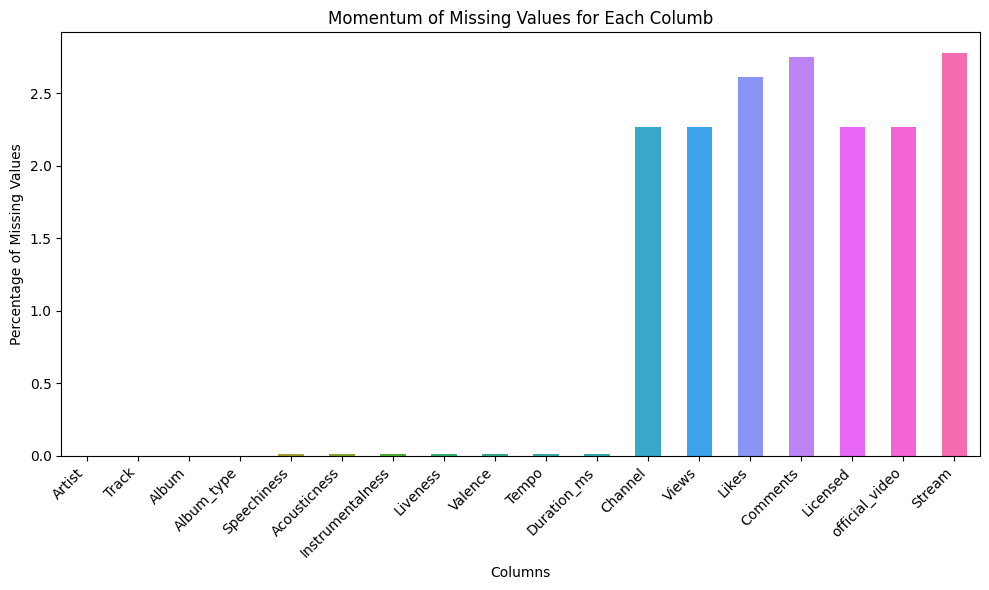

In [21]:
# Define a custom color palette
colors = sns.color_palette('husl', len(missing_values))

# Calculte the momentum of missing values for each column
missing_values_momentum = (df.isnull().sum() / len(df)) * 100

# Create a bar plot with custom colors
plt.figure(figsize=(10,6))
missing_values_momentum.plot(kind='bar', color=colors)
plt.title('Momentum of Missing Values for Each Columb')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation = 45, ha= 'right')
plt.tight_layout()
plt.show()

* Handle nulls by filling in the mean value  
Because Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms have only 2 missing values each

In [22]:
columns_with_few_missing = ['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

for column in columns_with_few_missing:
    df[column].fillna(df[column].mean(), inplace=True)

* Handle nulls by drop column

In [24]:
columns_with_many_missing = ['Channel', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream']

for column in columns_with_many_missing:
    df.dropna(subset=[column], inplace = True)

* Dataset after handling nulls

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19550 entries, 0 to 20717
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19550 non-null  object 
 1   Track             19550 non-null  object 
 2   Album             19550 non-null  object 
 3   Album_type        19550 non-null  object 
 4   Speechiness       19550 non-null  float64
 5   Acousticness      19550 non-null  float64
 6   Instrumentalness  19550 non-null  float64
 7   Liveness          19550 non-null  float64
 8   Valence           19550 non-null  float64
 9   Tempo             19550 non-null  float64
 10  Duration_ms       19550 non-null  float64
 11  Channel           19550 non-null  object 
 12  Views             19550 non-null  float64
 13  Likes             19550 non-null  float64
 14  Comments          19550 non-null  float64
 15  Licensed          19550 non-null  object 
 16  official_video    19550 non-null  object 
 17

In [26]:
# Show Num of Missing values in each column
print(df.isna().sum())

Artist              0
Track               0
Album               0
Album_type          0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [27]:
# Select only the numerical columns for descriptive statistics
numerical_columns = df.select_dtypes(include=['float64'])
numerical_des = numerical_columns.describe()
print(numerical_des)

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  19550.000000  19550.000000      19550.000000  19550.000000   
mean       0.095392      0.289106          0.055292      0.191227   
std        0.106241      0.285901          0.192514      0.165193   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.044400          0.000000      0.094000   
50%        0.050700      0.190000          0.000002      0.125000   
75%        0.104000      0.470000          0.000434      0.234000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  19550.000000  19550.000000  1.955000e+04  1.955000e+04  1.955000e+04   
mean       0.528950    120.605704  2.246281e+05  9.545249e+07  6.700229e+05   
std        0.245222     29.618583  1.269093e+05  2.775678e+08  1.805012e+06   
min        0.000000      0.000000  3.098500e+04  2.600000e+01 